In [3]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        n_samples, n_features = X.shape

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            clusters = [[] for _ in range(self.k)]

            for point_idx, point in enumerate(X):
                distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
                closest_centroid_idx = np.argmin(distances)
                clusters[closest_centroid_idx].append(point)

            prev_centroids = self.centroids.copy()

            for i in range(self.k):
                if clusters[i]:
                    self.centroids[i] = np.mean(clusters[i], axis=0)
                else:
                    self.centroids[i] = prev_centroids[i]

            centroid_shift = np.sum([np.linalg.norm(prev_centroids[i] - self.centroids[i]) for i in range(self.k)])

            if centroid_shift < self.tol:
                break

    def predict(self, X):
        labels = []
        for point in X:
            distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
            labels.append(np.argmin(distances))
        return np.array(labels)

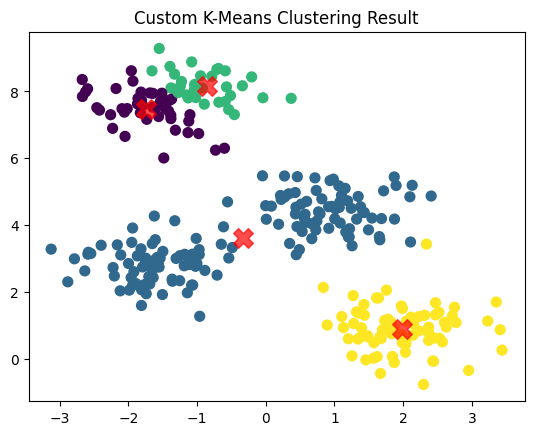

In [4]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(k=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, alpha=0.7, marker='X')
plt.title("Custom K-Means Clustering Result")
plt.show()